In [17]:
import speech_recognition as sr
import pyaudio
import numpy as np


In [2]:
mic=sr.Microphone()
r=sr.Recognizer()

In [40]:
with mic as source:     # mention source it will be either Microphone or audio files.
    print("Speak Anything :")
    print(r.energy_threshold)
    r.adjust_for_ambient_noise(source) # For calibration purpose, it takes some time to listen our voice
    audio = r.listen(source,timeout=1, phrase_time_limit=10)  
    # listen to the source  audio = r.listen(source,timeout=1,phrase_time_limit=10)
    f1=open('Recorded.wav', 'wb')
    f1.write(audio.get_wav_data())
    f1.close()
    try:
        text = r.recognize_google(audio)    # use recognizer to convert our audio into text part.
        print("You said : {}".format(text))
        
    except:
        print("Sorry could not recognize your voice")   
        

Speak Anything :
2.1425761982805245
You said : Crystal what can I do for you


In [44]:
frequency_sampling, audio_signal = wavfile.read("Recorded.wav")

## we have to print out that audio file and analyze the spectrum. 

In [45]:
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] / 
float(frequency_sampling), 2), 'seconds')
print(frequency_sampling)


Signal shape: (153600,)
Signal Datatype: int16
Signal duration: 3.48 seconds
44100


In [52]:
audio_signal1 = audio_signal[:10000]

In [53]:
time_axis = 1000 * np.arange(0, len(audio_signal1), 1) / float(frequency_sampling)

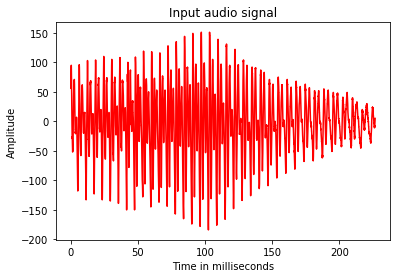

In [54]:
import matplotlib.pyplot as plt
plt.plot(time_axis, audio_signal1, 'r-')
plt.xlabel('Time in milliseconds')
plt.ylabel('Amplitude')
#plt.axis([0, 2, -1.5, 1.5])
plt.title('Input audio signal')
plt.show()